In [1]:
from tensorflow.python.client import device_lib

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6960270749996267463]

In [5]:
tf.__version__

'2.3.0'

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [2]:
# 폴더에서 이미지 불러오기
# IMG_DIR = 'D:/Ai/project/emotion_detection_dataset/fer2013/train/Angry/' #폴더 위치
# cnt = 1
# plt.figure(figsize = (30,30))
# for dirname, _, filenames in os.walk(IMG_DIR):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         if cnt >25:
#             continue
#         plt.subplot(5,5,cnt)
#         imgfile = dirname+'/'+filename
#         img = plt.imread(imgfile)
#         plt.imshow(img,cmap = 'bone')
#         plt.grid(False)
#         cnt += 1

In [3]:
dir = "C:/Ai/dataset"

In [16]:
dir = "C:/ai1/dataset/"

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               rotation_range=0.2, #random
#                                width_shift_range=0.2, #좌우 이동
#                                height_shift_range=0.2, #상하 이동
#                                zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #2%

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2)

In [26]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (180,180),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (180,180),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 9461 images belonging to 3 classes.
Found 1928 images belonging to 3 classes.


In [27]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

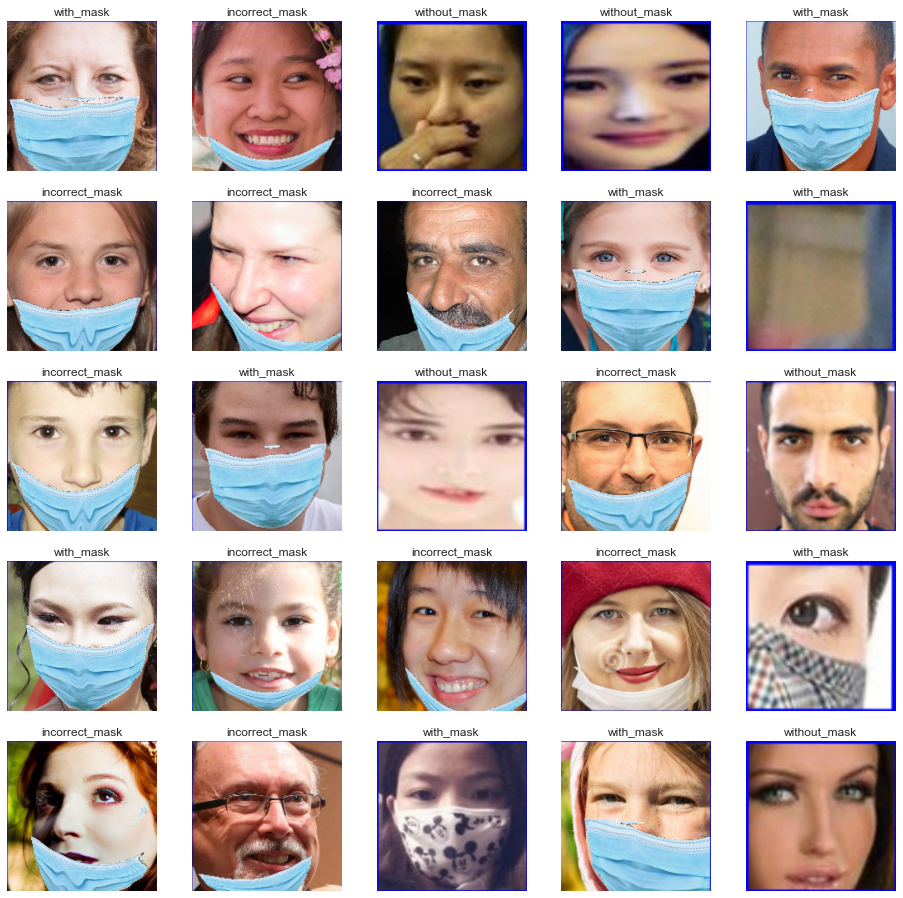

In [28]:
plt.figure(figsize = (16,16))

for i in range(25):
  image,label = train_data.next()

  plt.subplot(5,5,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

In [60]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, strides=(2, 2) activation="relu", input_shape=(180,180,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D( 64,  2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),
    
                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),
    

                              layers.Dense(3, activation= "softmax")
])

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 179, 179, 64)      832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 88, 88, 64)        16448     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 64)       

In [64]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [65]:
# fitting data to the model

hist = model.fit(train_data,
          epochs = 70,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/70
296/296 [==============================] - 126s 426ms/step - loss: 0.3091 - accuracy: 0.8867 - val_loss: 0.2610 - val_accuracy: 0.9087
Epoch 2/70
296/296 [==============================] - 127s 429ms/step - loss: 0.2208 - accuracy: 0.9178 - val_loss: 0.2074 - val_accuracy: 0.9212
Epoch 3/70
296/296 [==============================] - 128s 434ms/step - loss: 0.1789 - accuracy: 0.9264 - val_loss: 0.1840 - val_accuracy: 0.9212
Epoch 4/70
296/296 [==============================] - 128s 433ms/step - loss: 0.1625 - accuracy: 0.9344 - val_loss: 0.1865 - val_accuracy: 0.9201
Epoch 5/70
296/296 [==============================] - 128s 432ms/step - loss: 0.1523 - accuracy: 0.9384 - val_loss: 0.1673 - val_accuracy: 0.9357
Epoch 6/70
296/296 [==============================] - 129s 435ms/step - loss: 0.1372 - accuracy: 0.9422 - val_loss: 0.1373 - val_accuracy: 0.9429
Epoch 7/70
296/296 [==============================] - 128s 431ms/step - loss: 0.1294 - accuracy: 0.9436 - val_loss: 0.1291 -

Epoch 57/70
296/296 [==============================] - 130s 440ms/step - loss: 0.0405 - accuracy: 0.9836 - val_loss: 0.0225 - val_accuracy: 0.9917
Epoch 58/70
296/296 [==============================] - 130s 439ms/step - loss: 0.0335 - accuracy: 0.9857 - val_loss: 0.0203 - val_accuracy: 0.9933
Epoch 59/70
296/296 [==============================] - 130s 439ms/step - loss: 0.0390 - accuracy: 0.9844 - val_loss: 0.0247 - val_accuracy: 0.9917
Epoch 60/70
296/296 [==============================] - 131s 441ms/step - loss: 0.0357 - accuracy: 0.9843 - val_loss: 0.0188 - val_accuracy: 0.9927
Epoch 61/70
296/296 [==============================] - 129s 437ms/step - loss: 0.0403 - accuracy: 0.9848 - val_loss: 0.0207 - val_accuracy: 0.9933
Epoch 62/70
296/296 [==============================] - 129s 436ms/step - loss: 0.0415 - accuracy: 0.9851 - val_loss: 0.0385 - val_accuracy: 0.9865
Epoch 63/70
296/296 [==============================] - 130s 439ms/step - loss: 0.0366 - accuracy: 0.9841 - val_loss: 0

In [66]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

61/61 [==============================] - 7s 108ms/step - loss: 0.0220 - accuracy: 0.9922
Model Accuracy:  99.22 %


In [50]:
type(hist)

tensorflow.python.keras.callbacks.History

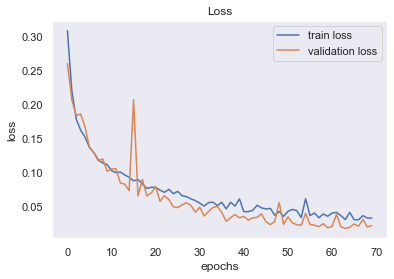

In [67]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

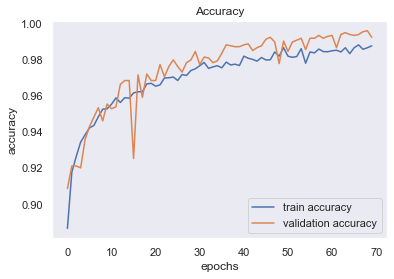

In [68]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

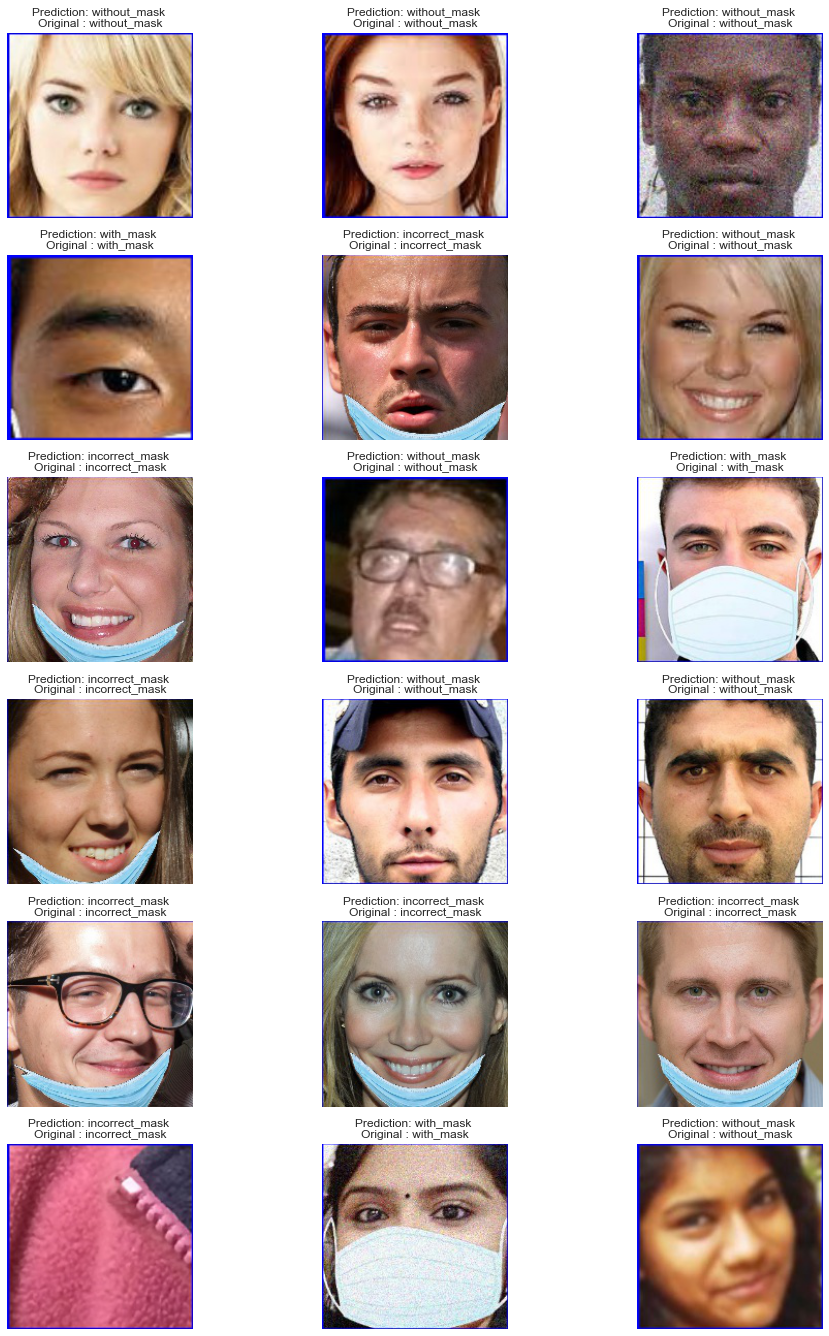

In [34]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")


In [69]:
dir1 = "C:/test"

In [70]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               rotation_range=0.2, #random
#                                width_shift_range=0.2, #좌우 이동
#                                height_shift_range=0.2, #상하 이동
#                                zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #2%

test_gen = ImageDataGenerator(rescale= 1/255.)

In [71]:
train_data = train_gen.flow_from_directory(dir1,
                                           target_size = (180,180),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )


Found 2 images belonging to 1 classes.


In [72]:
model_evaluation = model.evaluate(train_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

1/1 [==============================] - 0s 2ms/step - loss: 10.9357 - accuracy: 0.0000e+00
Model Accuracy:  0.00 %
